# Survival Analysis in Python

U.S. birth data

Allen B. Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from empyrical_dist import Pmf, Cdf, Surv, Hazard

Data from https://www.cdc.gov/nchs/data_access/vitalstatsonline.htm

[2017 Birth Data](ftp://ftp.cdc.gov/pub/Health_Statistics/NCHS/Datasets/DVS/natality/Nat2017us.zip)

[Warning! Data Use Restrictions Read Carefully Before Using](https://www.cdc.gov/nchs/data_access/restrictions.htm)

The Public Health Service Act (Section 308 (d)) provides that the data collected by the National Center for Health Statistics (NCHS), Centers for Disease Control and Prevention (CDC), may be used only for the purpose of health statistical reporting and analysis.

Any effort to determine the identity of any reported case is prohibited by this law.

NCHS does all it can to assure that the identity of data subjects cannot be disclosed. All direct identifiers, as well as any characteristics that might lead to identification, are omitted from the dataset. Any intentional identification or disclosure of a person or establishment violates the assurances of confidentiality given to the providers of the information. Therefore, users will:

* Use the data in this dataset for statistical reporting and analysis only.

* Make no use of the identity of any person or establishment discovered inadvertently and advise the Director, NCHS, of any such discovery.

* Not link this dataset with individually identifiable data from other NCHS or non- NCHS datasets.

By using these data you signify your agreement to comply with the above-stated statutorily based requirements.


In [7]:
dat_file = 'data/Nat2017PublicUS.c20180516.r20180808.txt.gz'
    
names = ['MAGER']
    
colspecs = [(75-1, 76),
           ]

df = pd.read_fwf(dat_file,
                 colspecs=colspecs,
                 names=names,
                 header=None,
                 #nrows=100000,
                 compression='gzip'
                )

df.head()

,MAGER
0,31
1,33
2,36
3,26
4,19


In [8]:
df.shape

(3864754, 1)

In [9]:
cdf_age = Cdf.from_seq(df['MAGER'])

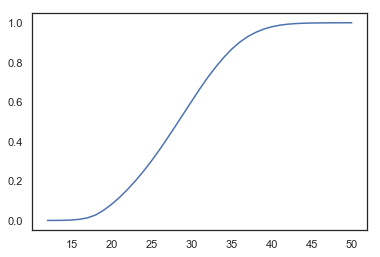

In [10]:
cdf_age.plot()

In [11]:
df['MAGER'].describe()

count    3.864754e+06
mean     2.884684e+01
std      5.815096e+00
min      1.200000e+01
25%      2.500000e+01
50%      2.900000e+01
75%      3.300000e+01
max      5.000000e+01
Name: MAGER, dtype: float64

In [13]:
df.to_hdf('data/birth.hd5', 'birth')

In [14]:
birth = pd.read_hdf('data/birth.hd5', 'birth')

In [15]:
birth.head()

,MAGER
0,31
1,33
2,36
3,26
4,19


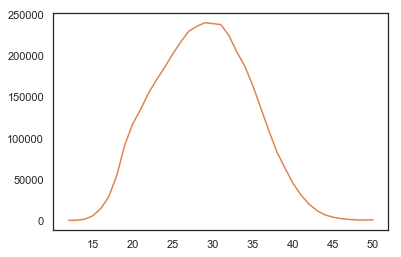

In [51]:
pmf_age = Pmf.from_seq(df['MAGER'], normalize=False)
pmf_age.plot()

From https://www.census.gov/data/datasets/2017/demo/popest/nation-detail.html


[Annual estimates of the resident population by single year of age and sex for the United States: April 1, 2010 to July 1, 2017 (NC-EST2017-AGESEX-RES)](https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/national/asrh/nc-est2017-agesex-res.csv)

In [45]:
census = pd.read_csv('data/nc-est2017-agesex-res.csv')
census.head()

,SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017
0,0,0,3944153,3944160,3951454,3962971,3926486,3931208,3954725,3984294,3955377,3939295
1,0,1,3978070,3978090,3957695,3966056,3977264,3942441,3948689,3973189,4004017,3975252
2,0,2,4096929,4096939,4090616,3970491,3978648,3991295,3958296,3965536,3990991,4021775
3,0,3,4119040,4119051,4111682,4101643,3981321,3990699,4005424,3973376,3981326,4006755
4,0,4,4063170,4063186,4077326,4121485,4111444,3992298,4003684,4019335,3987866,3995783


In [53]:
grouped = census.groupby('SEX')
grouped['POPESTIMATE2017'].sum()

SEX
0    651438356
1    320816238
2    330622118
Name: POPESTIMATE2017, dtype: int64

In [54]:
female_pop_2017 = grouped.get_group(2)
female_pop_2017.index = female['AGE']

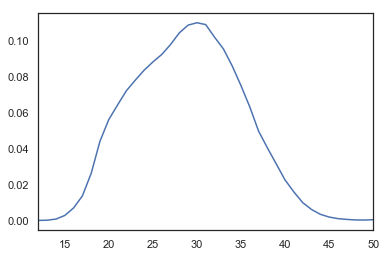

In [69]:
asfr = pd.Series.div(pmf_age, female_pop_2017['POPESTIMATE2017']).dropna()
asfr.plot()

In [70]:
asfr.sum() * 1000

1766.3434830965582

In [68]:
diff = female_pop_2017['POPESTIMATE2017'] - female_pop_2017['POPESTIMATE2016']
diff.mean() / female_pop_2017['POPESTIMATE2017'].mean()

0.006950176273445807